# [Simplified formulae of conversion from latitude, longitude (φ, λ) to UTM coordinates (E, N)](https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system#From_latitude,_longitude_(%CF%86,_%CE%BB)_to_UTM_coordinates_(E,_N))

Karney, Charles F. F. (2011). "Transverse Mercator with an accuracy of a few nanometers". J. Geodesy. 85 (8): 475–485. [arXiv:1002.1417](https://arxiv.org/abs/1002.1417).

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'sans'
mpl.rcParams['mathtext.it'] = 'sans:italic'

## [WGS 84 ellipsoid parameters](https://en.wikipedia.org/wiki/World_Geodetic_System#A_new_World_Geodetic_System:_WGS_84)

In [2]:
a = 6378137
f = 1/298.257223563
λw, λe = np.deg2rad(6), np.deg2rad(12)
λ, φ = np.meshgrid(np.arange(λw, λe, 0.01), np.arange(np.deg2rad(-90+1e-4), np.deg2rad(90-1e-4), 0.01))
λ0 = (λw + λe) / 2

## UTM parameters

In [3]:
k0 = 0.9996
E0 = 500000
N0 = np.where(φ < 0, 10000000, 0)

## Preliminary values

In [4]:
n = f / (2-f)
A = a / (1+n) * (1 + n**2/4 + n**4/64)
α = [1/2 * n - 2/3 * n**2 + 5/16 * n**3, 13/48 * n**2 - 3/5 * n**3, 61/240 * n**3]
β = [1/2 * n - 2/3 * n**2 + 37/96 * n**3, 1/48 * n**2 + 1/15 * n**3, 17/480 * n**3]
δ = [2 * n - 2/3 * n**2 - 2 * n**3, 7/3 * n ** 2 - 8/5 * n**3, 56/15 * n**3]

## Intermediate values

In [5]:
t = np.sinh(np.arctanh(np.sin(φ)) - 2 * n**(1/2) / (n+1) * np.arctanh(2 * n**(1/2) / (n+1) * np.sin(φ)))
ξʹ = np.arctan(t/np.cos(λ - λ0))
ηʹ = np.arctanh(np.sin(λ - λ0) / (1 + t**2)**(1/2))
σ = 1 + sum([2*j*α[j-1]*np.cos(2*j*ξʹ)*np.cosh(2*j*ηʹ) for j in range(1, 4)])
τ = sum([2*j*α[j-1]*np.sin(2*j*ξʹ)*np.sinh(2*j*ηʹ) for j in range(1, 4)])

## The final formulae are

In [6]:
E = E0 + k0 * A * (ηʹ + sum([α[j-1]*np.cos(2*j*ξʹ)*np.sinh(2*j*ηʹ) for j in range(1, 4)]))
N = N0 + k0 * A * (ξʹ + sum([α[j-1]*np.sin(2*j*ξʹ)*np.cosh(2*j*ηʹ) for j in range(1, 4)]))
k = k0 * A / a * np.sqrt((1 + ((1-n)/(1+n) * np.tan(φ))**2) * ((σ**2 + τ**2) / (t**2 + np.cos(λ - λ0)**2))) 
tʹ = (1 + t**2)**(1/2)
γ = np.arctan((τ * tʹ + σ * t * np.tan(λ - λ0)) / (σ * tʹ - τ * t * np.tan(λ - λ0)))

<IPython.core.display.Javascript object>


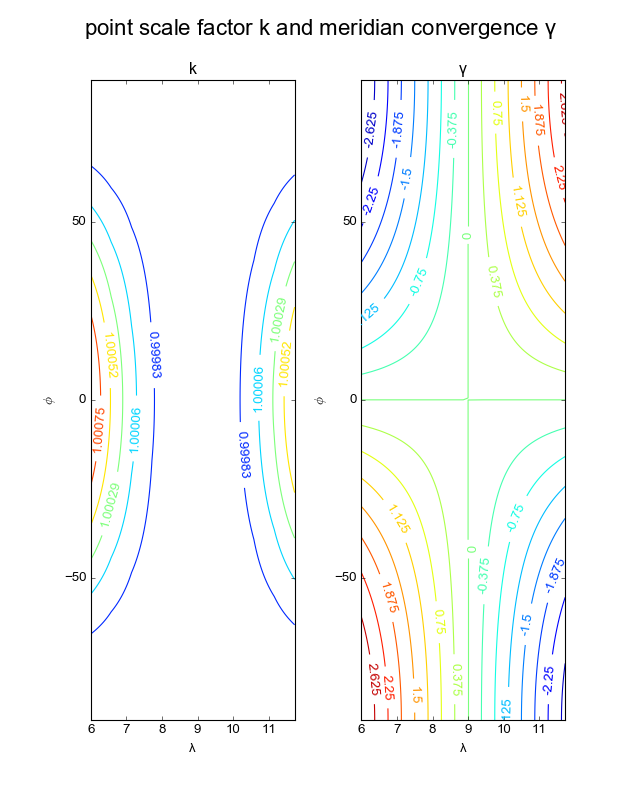

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8,10))
fig.suptitle(r'point scale factor $\mathrm{k}$ and meridian convergence $\mathrm{\gamma}$', fontsize=20)

γs = [*np.linspace(np.rad2deg(λw-λ0), 0, 9), *np.linspace(0, np.rad2deg(λe-λ0), 9)[1:]]

cs = [ax[0].contour(np.rad2deg(λ), np.rad2deg(φ), k, np.linspace(k0, np.max(k), 7)),
      ax[1].contour(np.rad2deg(λ), np.rad2deg(φ), np.rad2deg(γ), γs)]
ax[0].set_title(r'$\mathrm{k}$')
ax[1].set_title(r'$\mathrm{\gamma}$')

for axi, cnt in zip(ax, cs):
    axi.clabel(cnt, cnt.levels, fmt="%g")
    axi.set_aspect(0.1)
    axi.set_xlabel(r'$\mathrm{\lambda}$')
    axi.set_ylabel(r'$\mathrm{\phi}$')

<IPython.core.display.Javascript object>


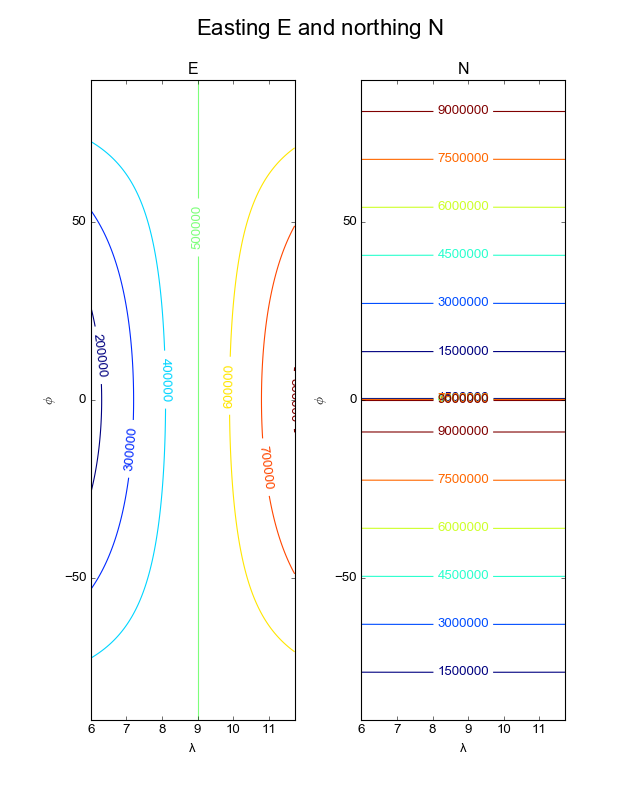

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,10))
fig.suptitle(r'Easting $\mathrm{E}$ and northing $\mathrm{N}$', fontsize=20)

cs = [ax[0].contour(np.rad2deg(λ), np.rad2deg(φ), E),
      ax[1].contour(np.rad2deg(λ), np.rad2deg(φ), N)]
ax[0].set_title(r'$\mathrm{E}$')
ax[1].set_title(r'$\mathrm{N}$')

for axi, cnt in zip(ax, cs):
    axi.clabel(cnt, cnt.levels, fmt='%.0f')
    axi.set_aspect(0.1)
    axi.set_xlabel(r'$\mathrm{\lambda}$')
    axi.set_ylabel(r'$\mathrm{\phi}$')

## Simplified formulas for scaling factor and convergence

References for [point scale](https://en.wikipedia.org/wiki/Transverse_Mercator_projection#Point_scale) and [convergence](https://en.wikipedia.org/wiki/Transverse_Mercator_projection#Convergence)

<IPython.core.display.Javascript object>


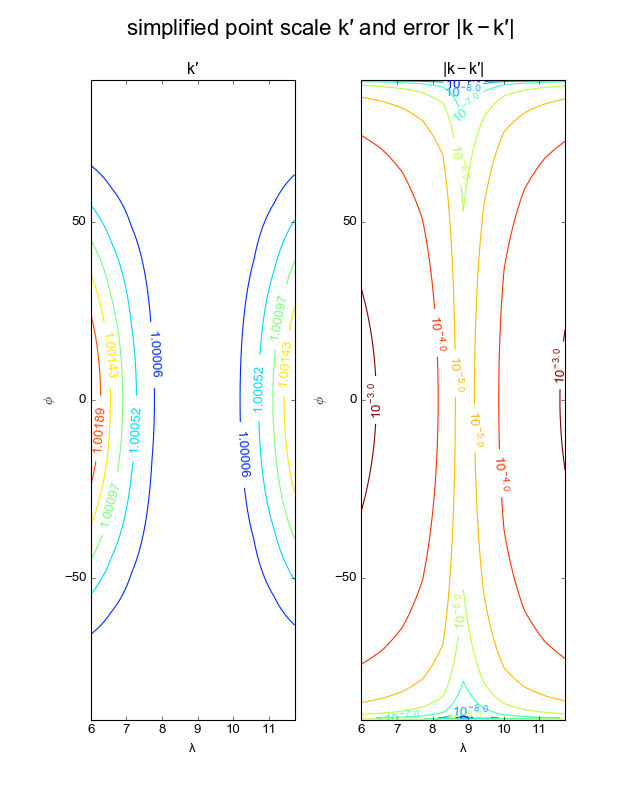

In [12]:
kʹ = k0 / (1 - np.sin(λ-λ0)**2 * np.cos(φ)**2)

fig, ax = plt.subplots(1, 2, figsize=(8,10))
fig.suptitle(r'simplified point scale $\mathrm{k\prime}$ and error $\mathrm{|k - k\prime|}$', fontsize=20)

cs = [(ax[0].contour(np.rad2deg(λ), np.rad2deg(φ), kʹ, np.linspace(k0, np.max(kʹ), 7)), r'$\mathrm{k\prime}$', r'%g'),
      (ax[1].contour(np.rad2deg(λ), np.rad2deg(φ), np.log10(np.abs(k - kʹ))), r'$\mathrm{|k-k\prime|}$', r'$\mathrm{10^{%.1f}}$')]

for axi, (cnt, title, fmt) in zip(ax, cs):
    axi.set_title(title)
    axi.clabel(cnt, cnt.levels, fmt=fmt)
    axi.set_aspect(0.1)
    axi.set_xlabel(r'$\mathrm{\lambda}$')
    axi.set_ylabel(r'$\mathrm{\phi}$')

<IPython.core.display.Javascript object>


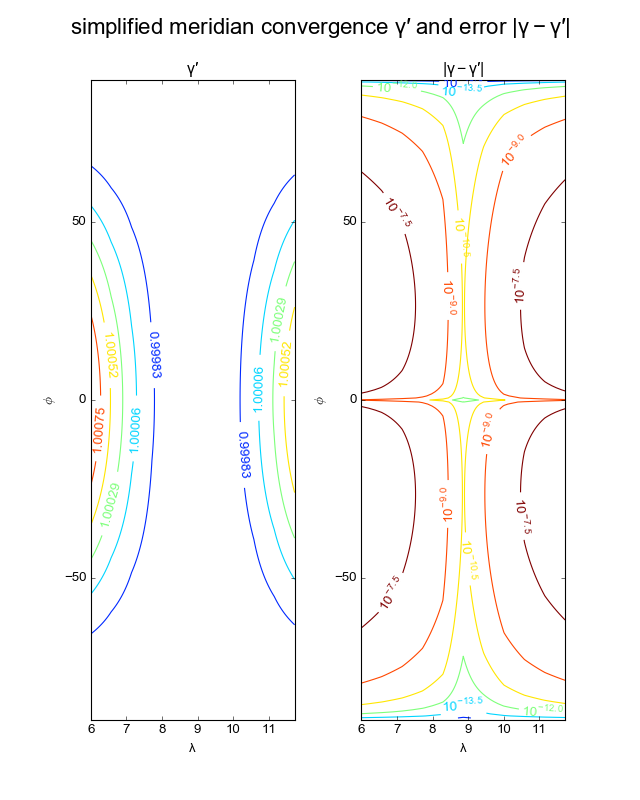

In [10]:
γʹ = np.arctan(np.tan(λ-λ0) * np.sin(φ))

fig, ax = plt.subplots(1, 2, figsize=(8,10))
fig.suptitle(r'simplified meridian convergence $\mathrm{\gamma\prime}$ and error $\mathrm{|\gamma - \gamma\prime|}$', fontsize=20)

err = np.abs(γ - γʹ)
err =  np.log10(err, where=err>0, out=np.full_like(err, -np.inf))

cs = [(ax[0].contour(np.rad2deg(λ), np.rad2deg(φ), k, np.linspace(k0, np.max(k), 7)), r'$\mathrm{\gamma\prime}$', r'%g'),
      (ax[1].contour(np.rad2deg(λ), np.rad2deg(φ), err), r'$\mathrm{|\gamma-\gamma\prime|}$', r'$\mathrm{10^{%.1f}}$')]

for axi, (cnt, title, fmt) in zip(ax, cs):
    axi.set_title(title)
    axi.clabel(cnt, cnt.levels, fmt=fmt)
    axi.set_aspect(0.1)
    axi.set_xlabel(r'$\mathrm{\lambda}$')
    axi.set_ylabel(r'$\mathrm{\phi}$')

### [True to Grid bearing](https://gis.stackexchange.com/a/82017)
 
           TN
    GN      |     MN
      \     |     /
       \    |    /
        \ MC|MD /
         \  |  /
          \ | /
           \|/  MB
            o ----------- OH

TN: true north α -- direction of local meridian (aka geographic or geodetic north)
GN: grid north β -- direction of map's south-to-north grid lines
MN: magnetic north -- direction of local magnetic force field

OH: our heading -- direction we're going or looking (aka bearing, azimuth or course)
    Note: this could be anywhere, of course (excuse the pun),  it just happens to
    point east in the diagram

MD: magnetic declination -- angle between true north & magnetic north (aka
    magnetic variation)
    Note: MN may be West or East of TN (ie, MD may be -ve or +ve)

MC: meridian convergence γ (aka grid convergence) -- angle between true north & grid north
    Note: GN may be East or West of TN (ie, MC may be +ve or -ve)

MB: magnetic bearing -- angle between magnetic north & our heading

TB: true bearing -- angle between true north & our heading
GB: grid bearing -- angle between grid north & our heading

Some simple relationships

TB = MB + MD
GB = TB - MC

#### The sign of grid convergence for transverse cylindrical projections:
* Gauss-Bomford convention α = β + γ
   <img src="files/GaussBomford.png">
* Survey convention α = β - γ
   <img src="files/Survey.png">


Ref http://www.iogp.org/bookstore/product/grid-convergence-geomatics-guidance-note-21/